<a href="https://colab.research.google.com/github/foramjivani/Coursera_Capstone/blob/main/Report_Analyzing_Neighborhoods_in_Bangalore%2C_India_for_Opening_a_Shopping_Mall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##             Analyzing Neighborhoods in Bangalore, India for Opening a Shopping Mall

> Foram Jivani

> 18 Apr, 2021




# 1. Introduction


## 1.1 Background

> We all know that, there are areas in a city where there are stores, eateries, etc. along the streets. If you live nearby, you might walk there to shop. If you live further away, you might get to the area by bus or train, or drive in, but once there, you’d walk from store to store and past any you’re not interested in, then back to however you got there. So for people who are living further have to go to downtown district and have to walk from one store to other other, which makes it difficult for people. So it is very important to have shopping mall into city.

> For many shoppers, visiting shopping malls is a great way to relax and enjoy themselves during weekends and holidays. 
The importance of a shopping mall is mainly for people to get out of the house for a while and do something entertaining. Shopping malls can provide the best shopping experiences such as social gatherings, entertainment, performances, product launches, promotions and festivals. The events list at shopping malls goes on and on for any, particular, person to be entertained for a number of hours.
It is one stop destination when one  can do grocery shopping, dine at restaurants, shop at the various fashion outlets, watch movies and perform many more activities. Any shopping mall can be a great place to hang out with friends, eat, shop, and more. You can go to all your favorite stores and personally  

> For retailers, the central location and the large crowd at the shopping malls provides a great distribution channel to market their products and services. Property developers are also taking advantage of this trend to build more shopping malls to cater to the demand. 

> Opening shopping malls allows property developers to earn consistent rental income. Of course, as with any business decision, opening a new shopping mall requires serious consideration and is a lot more complicated than it seems. Particularly, the location of the shopping mall is one of the most important decisions that will determine whether the mall will be a success or a failure.

## 1.2 Business Problem

> Bangalore, officially known as Bengaluru, is the capital and the largest city of the Indian state of Karnataka and is one of the most densely populated cities in the world.The multi-cultural nature of the city is fun to live. However, even though bangalore is very big there are not many shopping malls in the city. And the current traffic problems in bangalore make it difficult for people to go for shopping mall which is at far end of city where they are living. Moreover it takes half a day to travel to famous shopping malls in Bangalore. Thus, the aim of this project is to study the neighborhoods in Bangalore to determine possible locations for opening a shopping mall. 
Using data science methodology and machine learning techniques like clustering,aims of this project is to provide answer to following question: In the Bangalore city, if a property developer is looking to open a new shopping mall, which place would you recommend to open it?

## 1.3 Interest

> This project can be useful for business owners, property developers, and entrepreneurs who are looking to invest in a shopping mall in Bangalore. The main objective of this project is to carefully analyze appropriate data and find recommendations for the stakeholders. Moreover it is also useful for people that are new to Bangalore to figure out what shopping malls are worth going to and where they are. 

# 2. Data Collection

> The data required for this project has been collected from multiple sources. A summary of the data required for this project is given below.




## 2.1 Neighborhoods Data


> Neighbourhood data is taken from https://kaggle.com The data is read into a pandas data frame using the read_csv() method. 



##2.2 Geographical Coordinates

> The geographical coordinates for Bangalore data has been obtained from the GeoPy library in python. This data is relevant for plotting the map of Bangalore using the Folium library in python. These coordinates are then further used for plotting using the Folium library in python.



## 2.3 Venue Data

> The venue data has been extracted using the Foursquare API. This data contains venue recommendations for all neighborhoods in Bangalore and is used to study the popular venues of different neighborhoods. 

> After finding the list of neighbourhoods, we then connect to the Foursquare API to gather information about venues inside each and every neighbourhood. For each neighbourhood, we have chosen the radius to be 1000 meters.

> The data retrieved from Foursquare contained information of venues within a specified distance of the longitude and latitude of the postcodes. The information obtained per venue as follows:

        1. Neighbourhood : Name of the Neighbourhood
        2. Neighbourhood Latitude : Latitude of the Neighbourhood
        3. Neighbourhood Longitude : Longitude of the Neighbourhood
        4. Venue : Name of the Venue
        5. Venue Latitude : Latitude of Venue
        6. Venue Longitude : Longitude of Venue
        7. Venue Category : Category of Venue


# 3. Methodology

we will be creating model with the help of python so as first step we will import all necessary pacakges.



```
!pip install geopy
!pip install geocoder
!pip install folium

import numpy as np
import pandas as pd
import json
from geopy.geocoders import Nominatim
import geocoder
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
from sklearn.metrics import silhouette_score
from bs4 import BeautifulSoup


```



## 3.1 Data Collection

> The following data is required for the project:
1.   Neighborhood data of Bangalore
2.   Geographical coordinates of Bangalore and all neighborhoods in Bangalore
3.   Venue data for neighborhoods in Bangalore


### 3.1.1 Neighborhood Data

> In this we have taken data from https://kaggle.com 

> The data is read into a pandas data frame using the read_csv() method and necessary features are slected. The top 10 rows of the dataframe are shown in Figure 1.

Screenshot 2021-04-19 at 4.52.07 PM.png

> After performing data wrangling on the dataframe we have found that it contains duplicates so we have removed duplicates and NAN values using ***drop_duplicates()*** and ***dropna()*** methods. 

> Final clean dataframe can be seen in below figure.

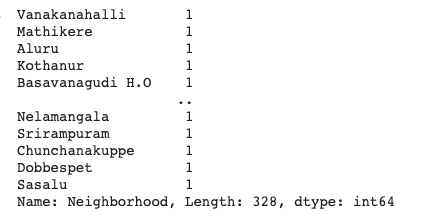

### 3.1.2 Geographical Coordinates

> The geographical coordinates for Bangalore data has been obtained from the GeoPy library in python. This data is relevant for plotting the map of Bangalore using the Folium library in python. These coordinates are then further used for plotting using the Folium library in python.

> The code for getting the geographical coordinates of Bangalore is shown below.

```
from geopy.geocoders import Nominatim 
address = 'Bangalore, IN'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Bangalore are {}, {}.'.format(latitude, longitude))
```

The geograpical coordinates of Bangalore are 12.9791198, 77.5912997.


### 3.1.3 Venue Data

> Venue Data is extracted using the Foursquare API. This data contains venue recommendations for all neighborhoods in Bangalore and information about top 200 venues inside each and every neighbourhood within 1000 meters. Foursquare has one of the largest database of 105+ million places and is used by over 125,000 developers. Foursquare API will provide many categories of the venue data, we are particularly interested in the Shopping Mall category in order to help us to solve the business problem put forward.

> The information obtained per venue as follows:
1. Neighbourhood : Name of the Neighbourhood
2. Neighbourhood Latitude : Latitude of the Neighbourhood
3. Neighbourhood Longitude : Longitude of the Neighbourhood
4. Venue : Name of the Venue
5. Venue Latitude : Latitude of Venue
6. Venue Longitude : Longitude of Venue
7. Venue Category : Category of Venue

> Below figure shows the top 10 rows depicting the results obtained after cleaning the data from Foursquare API.

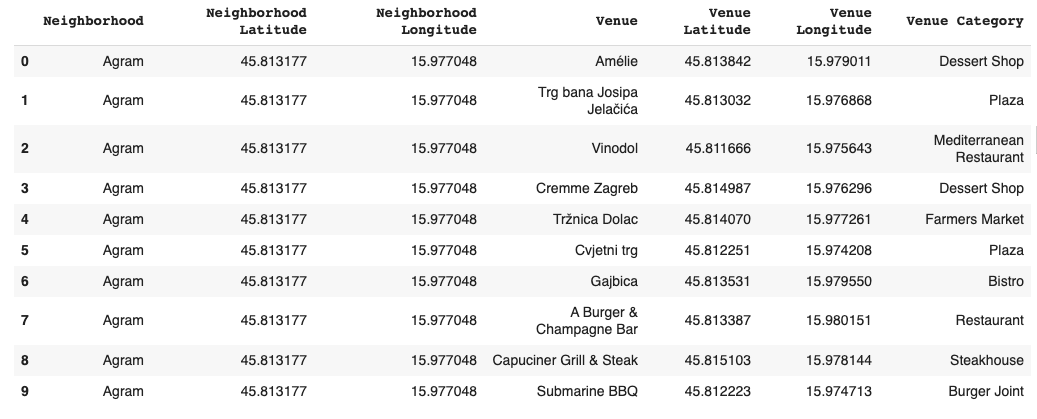

## 3.2 Data Visualization

> Now lets visualize the neighborhoods on a map using Folium. First we will obtain the geographical coordinates of Bangalore using GeoPy. This is shown in below figure.

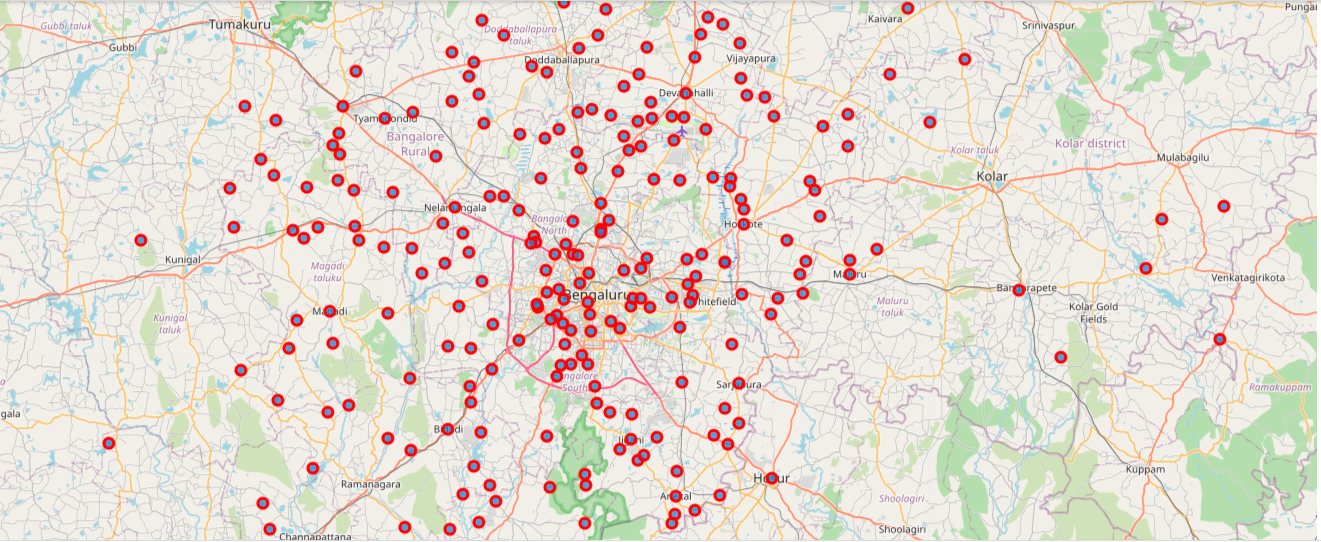





> We can also visualiza number of venues within each neighborhood using bar graph as below.

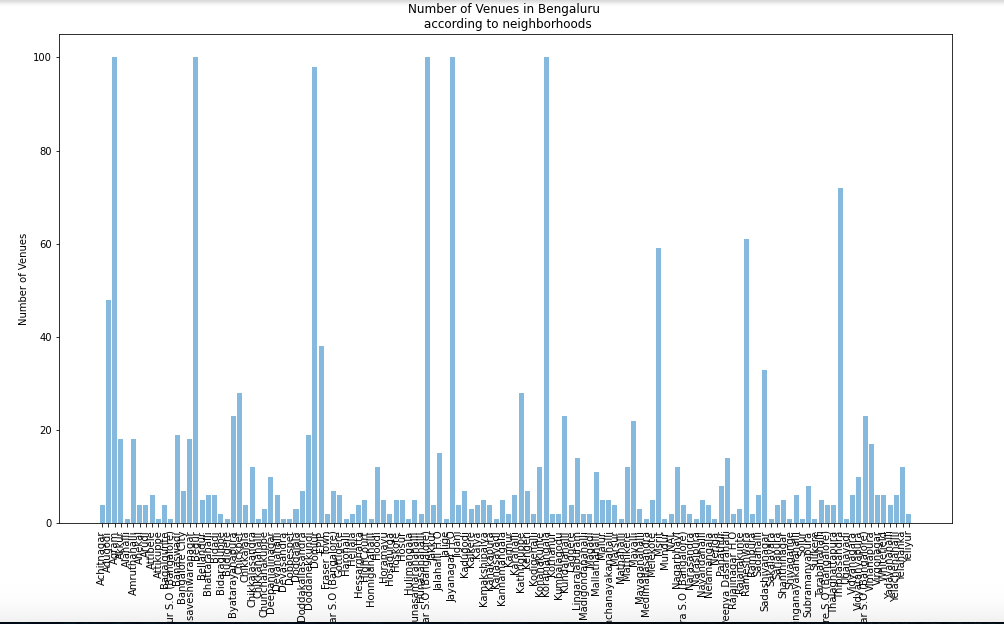

As our business problem is to given recommendation for shopping mall we can also visualize number of shopping malls within each neighborhood by applying filter on recived venue data for all neighborhoods in Bangalore city. Figure for the same can be view as follow.

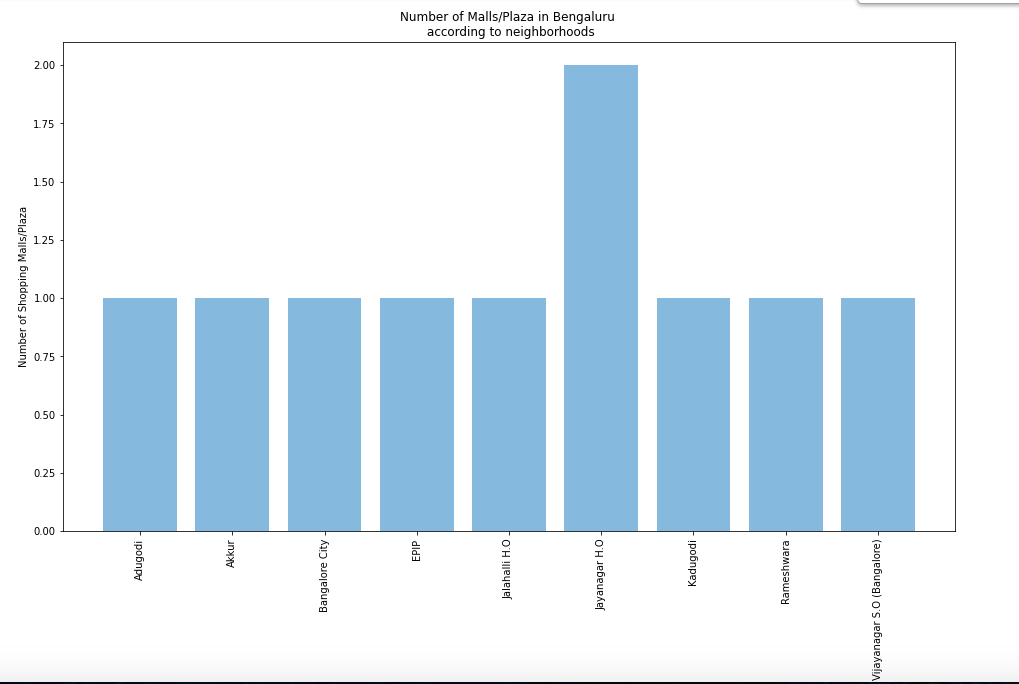

## 3.3. Feature Extraction

> With the data, we can check top n venues were returned for each neighbourhood. For this we will convert "Venue Catgory" feature in one-hot encoding. Then, we will analyse each neighbourhood by grouping the rows by neighbourhood and taking the mean of the frequency of occurrence of each venue category. By doing so, we are also preparing the data for use in clustering. Since we are analysing the “Shopping Mall” data, we will filter the “Shopping Mall” as venue category for the neighbourhoods.

> The one-hot encoding result is shown in below Figure which shows only the top 10 rows.

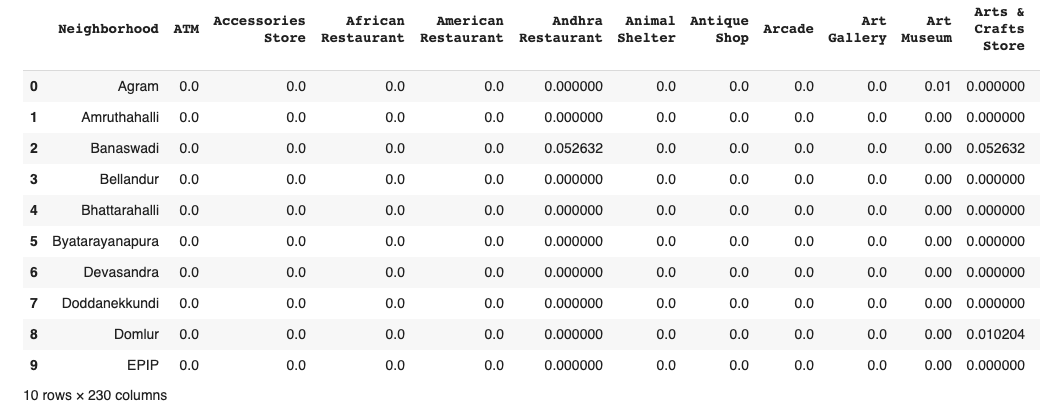


> Notice that most of the values are 0 since there were a large number of unique categories and not all neighborhoods had venues belonging to each category.

> A dataframe was also created which contained the top 10 most common venues of all neighborhoods. Though this is not a part of Feature Extraction, it is important to provide a glimpse into what this dataframe looks like as it will be used later to combine the results from the unsupervised learning model. The top 10 rows of this dataframe are shown in below figure

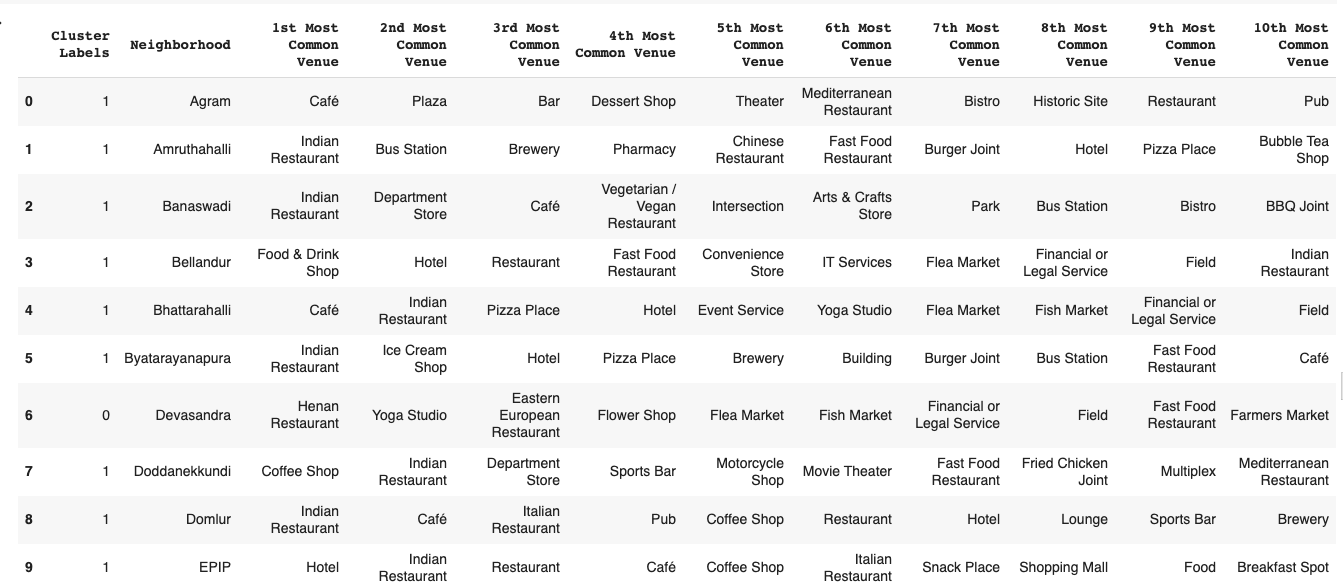

## 3.4 Model Training (KMeans)


> Lastly, we will perform clustering on the data by using k-means clustering. K-means clustering algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. It is one of the simplest and popular unsupervised machine learning algorithms and is particularly suited to solve the problem for this project. 

> We will cluster the neighbourhoods into 4 clusters based on their frequency of occurrence for “Shopping Mall”. The results will allow us to identify which neighbourhoods have higher concentration of shopping malls while which neighbourhoods have fewer number of shopping malls. Based on the occurrence of shopping malls in different neighbourhoods, it will help us to answer the question as to which neighbourhoods are most suitable to open new shopping malls.

### 3.4.1 Model Building

> One important aspect of the k-means model is to determine the number of clusters to use in model development. This was determined by the Silhouette score which was calculated for a range of clusters from 2 to 8. The resulting number of clusters and their respective Silhouette scores are shown in below figure.

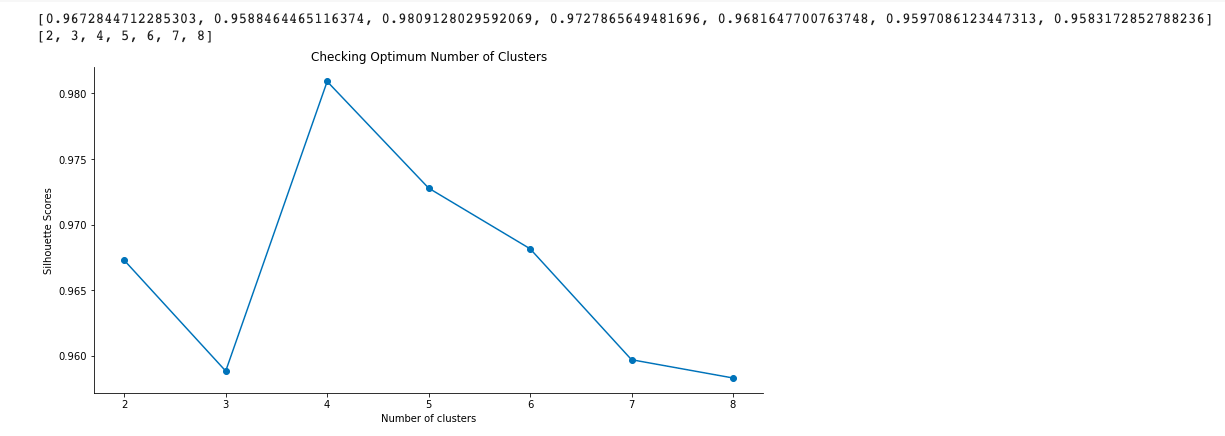

> It is evident that the Silhouette scores are not very high even as the number of clusters increases. This means that the inter-cluster distance is not very high over the range of k-values. Despite this, the data will be clustered to the best possible extent. For this, 4 clusters will be used for the k-means clustering model since it provides the highest silhouette score as seen in Figure.

> Moreover, Our data is processed, missing data is collected and compiled.


### 3.4.2 Visualizing the clustered Neighbourhoods

# 4. Results

> The results from the k-means clustering show that we can categorize the neighbourhoods into 3 clusters based on the frequency of occurrence for “Shopping Mall”:
1.   Cluster 0: Neighbourhoods with no existence of shopping malls
2.   Cluster 1: Neighbourhoods with low concentration shopping mall.
3.   Cluster 2: Neighbourhoods with medium concentration of shopping malls
4.   Cluster 3: Neighbourhoods with high concentration of shopping malls


> The results of the clustering are visualized in the map below with cluster 0 in red colour, cluster 1 in yellow colour,cluster 2 in cyan colour and cluster 3 in indigo color

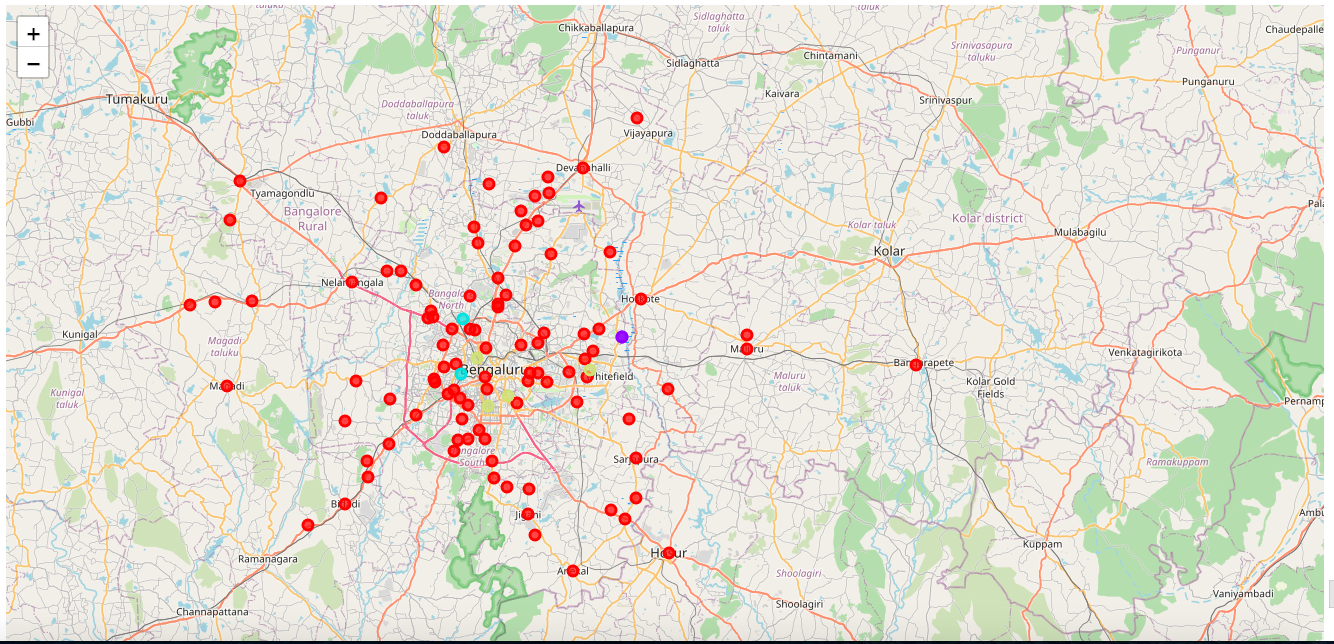

> Furthermore, neighborhoods in each individual cluster can be extracted using cluster labels and thus the details of specific clusters can be seen. This is done below for all clusters.

> cluster 0

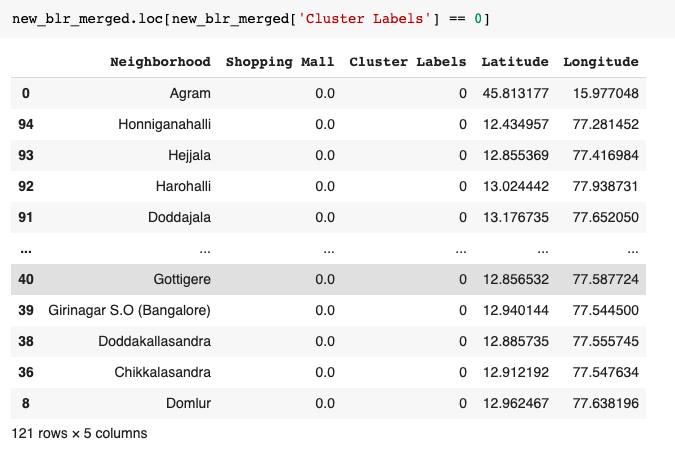

> clsuter 1

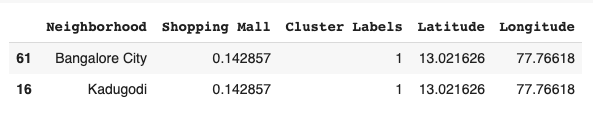

> cluster 2

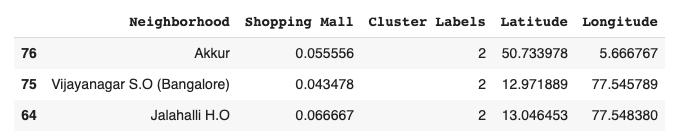

> cluster 3

Screenshot 2021-04-19 at 9.26.21 PM.png

# 5. Discussion

> As observations noted from the map in the Results section, most of the shopping malls are concentrated in the central area of Bangalore city, with the highest number in cluster 4 and moderate number in cluster 3. On the other hand, cluster 2 has very low number and cluster 1 has no shopping mall in the neighborhoods. This represents a great opportunity and high potential areas to open new shopping malls as there is very little to no competition from existing malls. 

> Meanwhile, shopping malls in cluster 4 are likely suffering from intense competition due to oversupply and high concentration of shopping malls. From another perspective, the results also show that the oversupply of shopping malls mostly happened in the central area of the city, with the suburb area still have very few shopping malls. 

> Therefore, this project recommends property developers to capitalize on these findings to open new shopping malls in neighborhoods in cluster 1 with little to no competition. Property developers with unique selling propositions to stand out from the competition can also open new shopping malls in neighborhoods in cluster 1 with moderate competition. 

> Lastly, property developers are advised to avoid neighborhoods in cluster 4 which already have high concentration of shopping malls and suffering from intense competition.

# 6. Future Work 

> In this project, we only consider one factor i.e. frequency of occurrence of shopping malls, there are other factors such as population and income of residents that could influence the location decision of a new shopping mall. However, to the best knowledge of this researcher such data are not available to the neighborhood level required by this project. Future research could devise a methodology to estimate such data to be used in the clustering algorithm to determine the preferred locations to open a new shopping mall. In addition, this project made use of the free Sandbox Tier Account of Foursquare API that came with limitations as to the number of API calls and results returned. Future research could make use of paid account to bypass these limitations and obtain more results.

# 7. Conclusion

> In this project, we have gone through the process of identifying the business problem, specifying the data required, extracting and preparing the data, performing machine learning by clustering the data into  clusters based on their similarities, and lastly providing recommendations to the relevant stakeholders i.e. property developers and investors regarding the best locations to open a new shopping mall. To answer the business question that was raised in the introduction section, the answer proposed by this project is: The neighborhoods in cluster 1 are the most preferred locations to open a new shopping mall. The findings of this project will help the relevant stakeholders to capitalize on the opportunities on high potential locations while avoiding overcrowded areas in their decisions to open a new shopping mall.

# Conclusion

> We came to know which neighborhoods are good choice for new shopping mall we can also look into its top venues and rating of those venues  to select final few locations to open a new shopping mall.

> In this project, the neighborhoods in Bangalore, India have been successfully analyzed for determining which would be the best neighborhoods for opening a new shopping mall.

> Based on the analysis, neighborhoods in cluster 1 are recommended as locations for the new shopping mall.

> The stakeholders and investors can further tune this by considering various other factors like transport, legal requirements, and costs associated which were out of the scope for this project and thus were not considered.
